In [33]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns #visualisation tool
import os

for dirname, _, filenames in os.walk('/LB1/input'): # List datasets in the working directory
    for filename in filenames:
        print(os.path.join(dirname, filename))

pokemon = pd.read_csv('/LB1/input/move-data.csv') # Reading the first dataset and displaying its heade
pokemon.head()

/LB1/input\combats.csv
/LB1/input\move-data.csv
/LB1/input\test.csv


,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
0,1,Pound,Normal,Physical,Tough,35,40.0,100.0,1
1,2,Karate Chop,Fighting,Physical,Tough,25,50.0,100.0,1
2,3,Double Slap,Normal,Physical,Cute,10,15.0,85.0,1
3,4,Comet Punch,Normal,Physical,Tough,15,18.0,85.0,1
4,5,Mega Punch,Normal,Physical,Tough,20,80.0,85.0,1


In [35]:
pokemon.tail()

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
723,724,Searing Sunraze Smash,Steel,Special,???,1,200.0,NaN,7
724,725,Menacing Moonraze Maelstrom,Ghost,Special,???,1,200.0,NaN,7
725,726,Let's Snuggle Forever,Fairy,Physical,???,1,190.0,NaN,7
726,727,Splintered Stormshards,Rock,Physical,???,1,190.0,NaN,7
727,728,Clangorous Soulblaze,Dragon,Special,???,1,185.0,NaN,7


In [37]:
pokemon.columns

Index(['Index', 'Name', 'Type', 'Category', 'Contest', 'PP', 'Power',
       'Accuracy', 'Generation'],
      dtype='object')

In [39]:
pokemon.shape

(728, 9)

In [41]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       728 non-null    int64  
 1   Name        728 non-null    object 
 2   Type        728 non-null    object 
 3   Category    728 non-null    object 
 4   Contest     728 non-null    object 
 5   PP          728 non-null    int64  
 6   Power       414 non-null    float64
 7   Accuracy    448 non-null    float64
 8   Generation  728 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 51.3+ KB


In [45]:
print(pokemon['Type'].value_counts(dropna = False)) # Looking for a frequency of pokemon types

Type
Normal      181
Psychic      64
Fighting     44
Grass        43
Dark         39
Fire         36
Electric     34
Water        34
Bug          30
Poison       28
Ground       27
Flying       27
Ghost        27
Steel        26
Ice          25
Fairy        24
Rock         20
Dragon       19
Name: count, dtype: int64


In [47]:
pokemon.describe() # Ignoring NULL entries

,Index,PP,Power,Accuracy,Generation
count,728.000000,728.000000,414.000000,448.000000,728.000000
mean,364.500000,14.162088,81.173913,96.004464,3.679945
std,210.299786,8.817177,40.278013,8.226110,2.084998
min,1.000000,1.000000,10.000000,50.000000,1.000000
25%,182.750000,10.000000,60.000000,95.000000,2.000000
50%,364.500000,10.000000,80.000000,100.000000,4.000000
75%,546.250000,20.000000,100.000000,100.000000,5.000000
max,728.000000,40.000000,250.000000,100.000000,7.000000


<Axes: title={'center': 'Power'}, xlabel='Accuracy'>

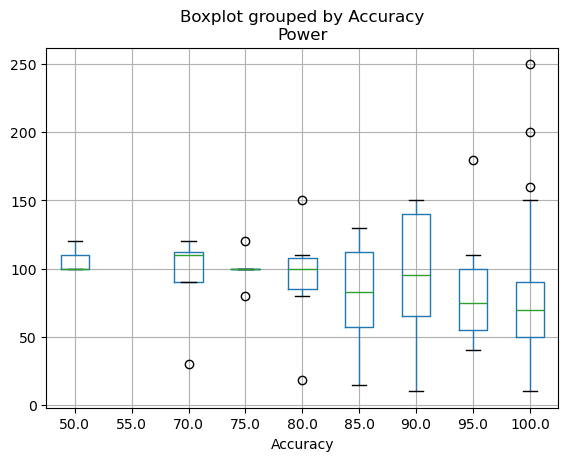

In [49]:
pokemon.boxplot(column = 'Power', by = 'Accuracy') # Ordering pokemons' Power by their Accuracy

In [51]:
pokemon_new = pokemon.head(10) # Creating a new limited dataset which takes only first 10 entries from the original dataset
pokemon_new

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
0,1,Pound,Normal,Physical,Tough,35,40.0,100.0,1
1,2,Karate Chop,Fighting,Physical,Tough,25,50.0,100.0,1
2,3,Double Slap,Normal,Physical,Cute,10,15.0,85.0,1
3,4,Comet Punch,Normal,Physical,Tough,15,18.0,85.0,1
4,5,Mega Punch,Normal,Physical,Tough,20,80.0,85.0,1
5,6,Pay Day,Normal,Physical,Clever,20,40.0,100.0,1
6,7,Fire Punch,Fire,Physical,Tough,15,75.0,100.0,1
7,8,Ice Punch,Ice,Physical,Beautiful,15,75.0,100.0,1
8,9,Thunder Punch,Electric,Physical,Cool,15,75.0,100.0,1
9,10,Scratch,Normal,Physical,Tough,35,40.0,100.0,1


In [57]:
pokemon_melted = pd.melt(frame = pokemon_new,id_vars = 'Name', value_vars = ['Power','Accuracy']) # Melting the frame which represents the variable (pokemon_new)
pokemon_melted

,Name,variable,value
0,Pound,Power,40.0
1,Karate Chop,Power,50.0
2,Double Slap,Power,15.0
3,Comet Punch,Power,18.0
4,Mega Punch,Power,80.0
5,Pay Day,Power,40.0
6,Fire Punch,Power,75.0
7,Ice Punch,Power,75.0
8,Thunder Punch,Power,75.0
9,Scratch,Power,40.0


In [59]:
pokemon_melted.pivot(index = 'Name', columns = 'variable', values = 'value') # Pivoting the melted dataframe

variable,Accuracy,Power
Name,,
Comet Punch,85.0,18.0
Double Slap,85.0,15.0
Fire Punch,100.0,75.0
Ice Punch,100.0,75.0
Karate Chop,100.0,50.0
Mega Punch,85.0,80.0
Pay Day,100.0,40.0
Pound,100.0,40.0
Scratch,100.0,40.0


In [69]:
pokemonHead = pokemon.head()  # Saving the first 5 entries from the dataset pokemon.csv into the first dataframe
pokemonTail = pokemon.tail()  # Saving the lastt 5 entries from the dataset pokemon.csv into the second dataframe
concatPokemon1 = pd.concat([pokemonHead,pokemonTail], axis = 0, ignore_index = True) # Concat pokemonHead and pokemonTail dataframes; 'axis = 0' adds dataframes in row
concatPokemon1

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
0,1,Pound,Normal,Physical,Tough,35,40.0,100.0,1
1,2,Karate Chop,Fighting,Physical,Tough,25,50.0,100.0,1
2,3,Double Slap,Normal,Physical,Cute,10,15.0,85.0,1
3,4,Comet Punch,Normal,Physical,Tough,15,18.0,85.0,1
4,5,Mega Punch,Normal,Physical,Tough,20,80.0,85.0,1
5,724,Searing Sunraze Smash,Steel,Special,???,1,200.0,NaN,7
6,725,Menacing Moonraze Maelstrom,Ghost,Special,???,1,200.0,NaN,7
7,726,Let's Snuggle Forever,Fairy,Physical,???,1,190.0,NaN,7
8,727,Splintered Stormshards,Rock,Physical,???,1,190.0,NaN,7
9,728,Clangorous Soulblaze,Dragon,Special,???,1,185.0,NaN,7


In [75]:
pokemonPower = pokemon['Power'].head()
pokemonAccuracy = pokemon['Accuracy'].head()
concatPokemon2 = pd.concat([pokemonPower,pokemonAccuracy], axis = 1) # Concat two dataframes; 'axis = 1' adds them in column
concatPokemon2

,Power,Accuracy
0,40.0,100.0
1,50.0,100.0
2,15.0,85.0
3,18.0,85.0
4,80.0,85.0


In [91]:
pokemon.dtypes

Index                  int64
Name                  object
Type                  object
Category      string[python]
Contest               object
PP                   float64
Power                float64
Accuracy             float64
Generation             int64
dtype: object

In [87]:
pokemon['Category'] = pokemon['Category'].astype('string') # Converting the type of the field 'Category' from object into 'string'
pokemon['PP'] = pokemon['PP'].astype('float') # Converting the type of the field 'PP' from int64 into 'float64'

In [89]:
pokemon.dtypes

Index                  int64
Name                  object
Type                  object
Category      string[python]
Contest               object
PP                   float64
Power                float64
Accuracy             float64
Generation             int64
dtype: object

In [95]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       728 non-null    int64  
 1   Name        728 non-null    object 
 2   Type        728 non-null    object 
 3   Category    728 non-null    string 
 4   Contest     728 non-null    object 
 5   PP          728 non-null    float64
 6   Power       414 non-null    float64
 7   Accuracy    448 non-null    float64
 8   Generation  728 non-null    int64  
dtypes: float64(3), int64(2), object(3), string(1)
memory usage: 51.3+ KB


In [ ]:
pokemon['Power'].value_counts(dropna = False)

In [ ]:
pokemonTest = pokemon
pokemonTest['Power'].dropna(inplace = True) # Deleting all the NaN values in the column 'Power'
pokemonTest['Power'].fillna('empty', inplace = True) # Insert the string 'empty' in the column 'Power' where were Nan
pokemon['Power'].value_counts()

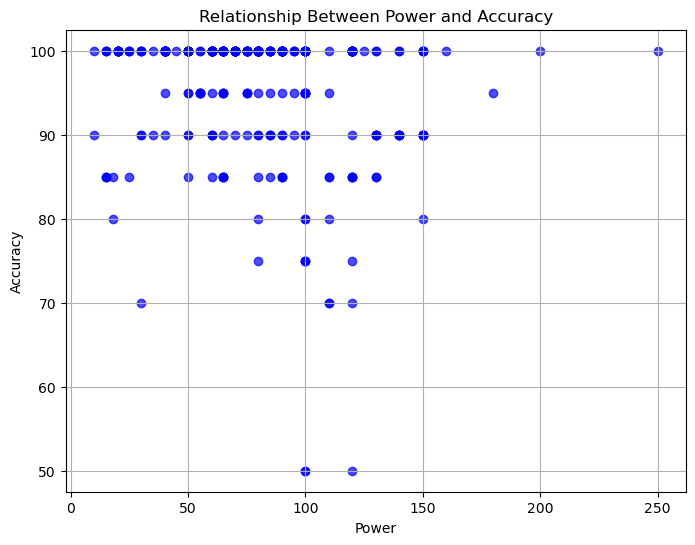

In [154]:
# Convert 'Power' and 'Accuracy' columns to numeric if they are not already
pokemon['Power'] = pd.to_numeric(pokemon['Power'], errors='coerce')
pokemon['Accuracy'] = pd.to_numeric(pokemon['Accuracy'], errors='coerce')

# Drop rows with NaN values in 'Power' or 'Accuracy'
filtered_data = pokemon.dropna(subset=['Power', 'Accuracy'])

# Plot the relationship between Power and Accuracy
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['Power'], filtered_data['Accuracy'], alpha=0.7, color='blue')
plt.title('Relationship Between Power and Accuracy')
plt.xlabel('Power')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

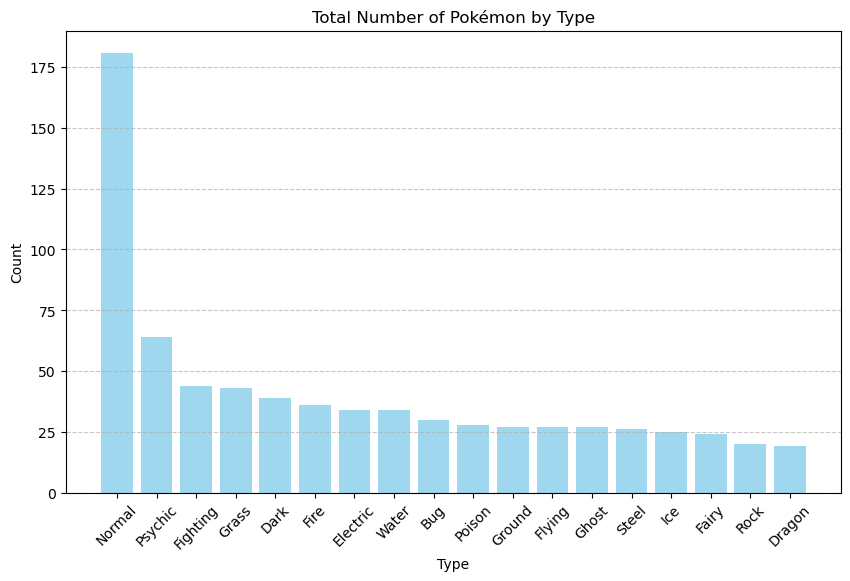

In [156]:
type_counts = pokemon['Type'].value_counts() # Counting the number of pokemons by their type

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(type_counts.index, type_counts.values, color='skyblue', alpha=0.8)
plt.title('Total Number of Pokémon by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

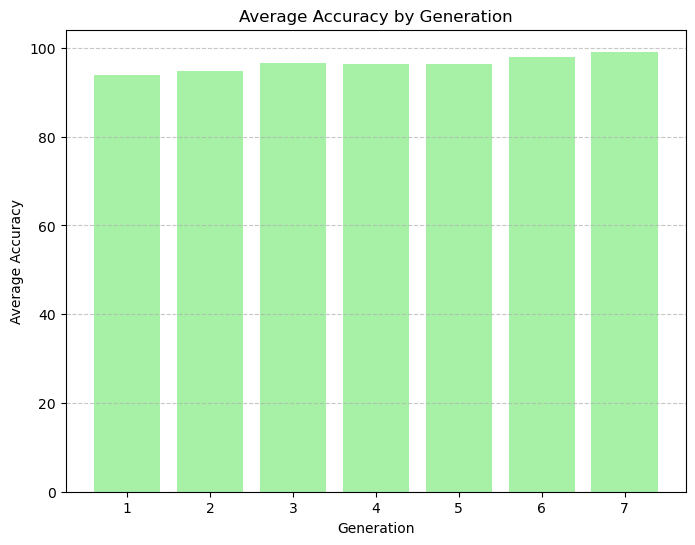

In [158]:
# Group data by Generation and calculate the average Accuracy for each Generation
pokemon['Accuracy'] = pd.to_numeric(pokemon['Accuracy'], errors='coerce')  # Ensure 'Accuracy' is numeric
generation_accuracy = pokemon.groupby('Generation')['Accuracy'].mean()

# Create a bar chart to display the relationship between Generation and Accuracy
plt.figure(figsize=(8, 6))
plt.bar(generation_accuracy.index, generation_accuracy.values, color='lightgreen', alpha=0.8)
plt.title('Average Accuracy by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Accuracy')
plt.xticks(generation_accuracy.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()